## Import libraries

In [1]:
%config Completer.use_jedi = False #to use autocomplete feature in jupyter
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

## Import dataset

In [2]:
df = pd.read_csv('fashion.csv')

## Feature Engineering

I manually removed some of the columns because out of 10k rows, 98% of the data was missing. Then I made a new .csv file which I will be using directly in this project.

In [3]:
df.head()

,sales_price,rating,delivery_type,amazon_prime__y_or_n,best_seller_tag__y_or_n,product_details__k_v_pairs/Customer_Reviews,discount_percentage
0,200.0,5.0,fulfilled_by_merchant,N,N,5.0 out of 5 stars 3 customer reviews,NaN
1,265.0,3.6,fulfilled_by_merchant,N,N,3.0 out of 5 stars 3 customer reviews,NaN
2,660.0,3.5,fulfilled_by_merchant,Y,N,3.7 out of 5 stars 23 customer reviews,NaN
3,195.0,3.0,fulfilled_by_merchant,N,N,3.0 out of 5 stars 1 customer review,NaN
4,1914.0,5.0,fulfilled_by_merchant,Y,N,Be the first to review this item,40%


Removing the % from the columns of discount_percentage

In [4]:
df.discount_percentage.head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    40%
5    36%
6    NaN
7    60%
8    NaN
9    NaN
Name: discount_percentage, dtype: object

In [5]:
df.discount_percentage = df.discount_percentage.str.replace('%', '')

We have only two values, and we want the columns to be int, so we map fulfilled_by_merchant as 0 and fulfilled_by_amazon as 1 in the delivery_type column

In [6]:
df.delivery_type.value_counts()

fulfilled_by_merchant    8844
fulfilled_by_amazon      1224
Name: delivery_type, dtype: int64

In [7]:
df['delivery_type'] = df['delivery_type'].map({'fulfilled_by_merchant' : 0, 'fulfilled_by_amazon': 1})

We have only two values, and we want the columns to be int, so we map N as 0 and Y as 1 in the amazon_prime__y_or_n column

In [8]:
df.amazon_prime__y_or_n.value_counts()

N    5569
Y    4499
Name: amazon_prime__y_or_n, dtype: int64

In [9]:
df['amazon_prime__y_or_n'] = df['amazon_prime__y_or_n'].map({'N' : 0, 'Y': 1})

In [10]:
df.best_seller_tag__y_or_n.value_counts()

N    10065
Y        3
Name: best_seller_tag__y_or_n, dtype: int64

This column is highly imbalanced so we drop it

In [11]:
df = df.drop(['best_seller_tag__y_or_n'], axis = 1) 

Let us now look at the product_details__k_v_pairs/Customer_Reviews column

In [12]:
df['product_details__k_v_pairs/Customer_Reviews'].value_counts()

Be the first to review this item           2223
5.0 out of 5 stars 1 customer review       1557
4.0 out of 5 stars 1 customer review        737
5.0 out of 5 stars 2 customer reviews       325
3.0 out of 5 stars 1 customer review        324
                                           ... 
3.5 out of 5 stars 17 customer reviews        1
3.8 out of 5 stars 104 customer reviews       1
4.7 out of 5 stars 30 customer reviews        1
4.3 out of 5 stars 58 customer reviews        1
3.3 out of 5 stars 320 customer reviews       1
Name: product_details__k_v_pairs/Customer_Reviews, Length: 906, dtype: int64

As you can see that there are huge sentences and we need to retain information from it

In [13]:
df['product_details__k_v_pairs/Customer_Reviews'] = df['product_details__k_v_pairs/Customer_Reviews'].replace('Be the first to review this item', '')

We handle the Be the first to review this item here

In [14]:
df['product_details__k_v_pairs/Customer_Reviews'] = df['product_details__k_v_pairs/Customer_Reviews'].apply(lambda x: str(x).split(' ')[0])

Getting only the reviews

## Handling missing values

In [15]:
df['product_details__k_v_pairs/Customer_Reviews'] = df['product_details__k_v_pairs/Customer_Reviews'].replace('nan', '')

In [16]:
df['product_details__k_v_pairs/Customer_Reviews'] = df['product_details__k_v_pairs/Customer_Reviews'].replace('', 'nan')

In [17]:
reviews_mean = df['product_details__k_v_pairs/Customer_Reviews'].astype(float).mean()

In [18]:
df['cust_review'] = df['product_details__k_v_pairs/Customer_Reviews'].replace('nan', reviews_mean)

In [19]:
df.isnull().sum()/len(df)*100

sales_price                                     9.137863
rating                                          0.000000
delivery_type                                   0.000000
amazon_prime__y_or_n                            0.000000
product_details__k_v_pairs/Customer_Reviews     0.000000
discount_percentage                            51.032976
cust_review                                     0.000000
dtype: float64

In [20]:
df.discount_percentage = df.discount_percentage.fillna(0)


In [21]:
df.sales_price = df.sales_price.fillna(df.sales_price.mean())

In [22]:
df.isnull().sum()/len(df)*100

sales_price                                    0.0
rating                                         0.0
delivery_type                                  0.0
amazon_prime__y_or_n                           0.0
product_details__k_v_pairs/Customer_Reviews    0.0
discount_percentage                            0.0
cust_review                                    0.0
dtype: float64

In [23]:
df.head()

,sales_price,rating,delivery_type,amazon_prime__y_or_n,product_details__k_v_pairs/Customer_Reviews,discount_percentage,cust_review
0,200.0,5.0,0,0,5.0,0,5.0
1,265.0,3.6,0,0,3.0,0,3.0
2,660.0,3.5,0,1,3.7,0,3.7
3,195.0,3.0,0,0,3.0,0,3.0
4,1914.0,5.0,0,1,nan,40,4.081537


As we have the cust_review column, we can drop product_details__k_v_pairs/Customer_Reviews

In [24]:
df = df.drop(['product_details__k_v_pairs/Customer_Reviews'], axis = 1) 

## Changing the data types

In [25]:
df.dtypes

sales_price             float64
rating                  float64
delivery_type             int64
amazon_prime__y_or_n      int64
discount_percentage      object
cust_review              object
dtype: object

In [26]:
df['cust_review'] = df['cust_review'].astype('float')
df['discount_percentage'] = df['discount_percentage'].astype('int')
df['sales_price'] = df['sales_price'].astype(int)
df['rating'] = df['rating'].astype(int)
df['cust_review'] = df['cust_review'].astype(int)

In [27]:
df.shape

(10068, 6)

## Feature Selection

I will pick the predictors that are related to the target variable. Instead of doing it randomly, I will fit a model and find the best set of predictors 

In [28]:
X = df.drop(['rating'], axis = 1)
y = df.rating
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 


[0.36168991 0.00372317 0.00419308 0.11414824 0.5162456 ]


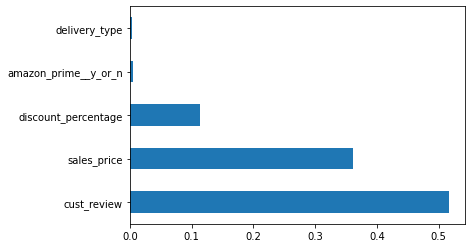

In [29]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

The best set of predictors are cust_review, sales_price, discount_percentage. We will use these in the model.

## Data Visualization/ Exploratory Data Analysis

In [30]:
df.head()

,sales_price,rating,delivery_type,amazon_prime__y_or_n,discount_percentage,cust_review
0,200,5,0,0,0,5
1,265,3,0,0,0,3
2,660,3,0,1,0,3
3,195,3,0,0,0,3
4,1914,5,0,1,40,4


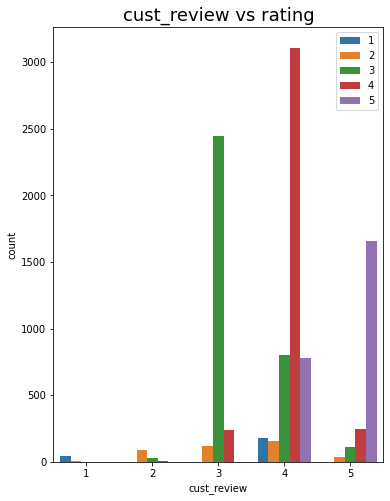

In [31]:

fig1 = plt.figure(figsize=(13,8))
ax1=fig1.add_subplot(121)
sns.countplot(data=df, hue='rating', x='cust_review')
plt.title('cust_review vs rating', fontsize = 18)
ax1.legend(loc=1)

It can be seen that products with higher customer review have higher product ratings

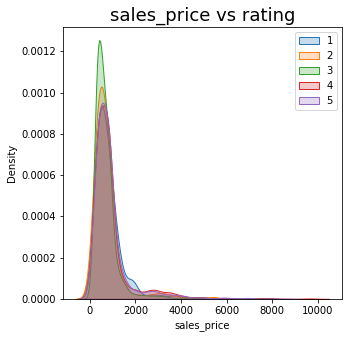

In [32]:
f= plt.figure(figsize=(5,5))

ax1=f.add_subplot()

sns.kdeplot(df.loc[df['rating'] == 1, 'sales_price'], label='1', shade = True)
sns.kdeplot(df.loc[df['rating'] == 2, 'sales_price'], label='2', shade = True)
sns.kdeplot(df.loc[df['rating'] == 3, 'sales_price'], label='3', shade = True)
sns.kdeplot(df.loc[df['rating'] == 4, 'sales_price'], label='4', shade = True)
sns.kdeplot(df.loc[df['rating'] == 5, 'sales_price'], label='5', shade = True)
plt.title('sales_price vs rating', fontsize = 18)
ax1.legend(loc = 1)

On average most product between sales_price 0-1000 are given 3 rating followed by 2 and 4.

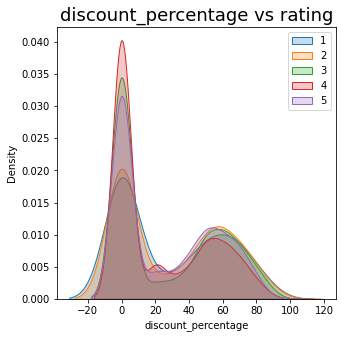

In [33]:
f= plt.figure(figsize=(5,5))

ax1=f.add_subplot()

sns.kdeplot(df.loc[df['rating'] == 1, 'discount_percentage'], label='1', shade = True)
sns.kdeplot(df.loc[df['rating'] == 2, 'discount_percentage'], label='2', shade = True)
sns.kdeplot(df.loc[df['rating'] == 3, 'discount_percentage'], label='3', shade = True)
sns.kdeplot(df.loc[df['rating'] == 4, 'discount_percentage'], label='4', shade = True)
sns.kdeplot(df.loc[df['rating'] == 5, 'discount_percentage'], label='5', shade = True)
plt.title('discount_percentage vs rating', fontsize = 18)
ax1.legend(loc = 1)

Most product which got a discount range between 40-60% got average rating of 2 and 5

## Modelling

In [34]:
    X = df[['cust_review', 'sales_price', 'discount_percentage']]
y = df['rating'].astype(str)

After creating the X and y variable, we split it into train and test sets

In [35]:
xtrain, xtest, ytrain, ytest = tts(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [36]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

### Logistic Regression Classifier 

Fit and predict a logistic regression model

In [37]:
list_accuracies = []

classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the Logistic Regression model

In [38]:
cm = confusion_matrix(ytest, ypred)
print(cm)
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

[[  0   0  20  46   0]
 [  0   0  57  46   6]
 [  0   0 612 222  27]
 [  0   0  56 757  61]
 [  0   0   0 189 418]]


0.7099721891140246

The accuracy is 0.71

### K-nearest neighbour Classifier 

Fit and predict a KNN model

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the K-nearest neighbour model

In [40]:
cm = confusion_matrix(ytest, ypred)
print(cm)
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

[[ 19   1   6  36   4]
 [  6  25  45  24   9]
 [  5   8 631 186  31]
 [ 15  11 159 592  97]
 [  4   7  32 178 386]]


0.6567342073897497

The accuracy is 0.66

### SVC Classifier 

Fit and predict a SVC model

In [41]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the SVC model

In [42]:
cm = confusion_matrix(ytest, ypred)
print(cm)
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

[[  0   0  20  46   0]
 [  0   0  57  46   6]
 [  0   0 612 222  27]
 [  0   0  56 757  61]
 [  0   0   0 189 418]]


0.7099721891140246

The accuracy is 0.71

### Gaussian NB Classifier 

Fit and predict a Gaussian NB model

In [43]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the Gaussian NB model

In [44]:
cm = confusion_matrix(ytest, ypred)
print(cm)
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

[[  5  14   1  46   0]
 [  2   2  53  46   6]
 [  0   1 609 224  27]
 [  0   0  55 758  61]
 [  0   0   0 190 417]]


0.7115613825983313

The accuracy is 0.7115

### Decision Tree Classifier 

Fit and predict a Decision Tree Classifier model

In [45]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the Decision Tree Classifier  model

In [46]:
cm = confusion_matrix(ytest, ypred)
print(cm)
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

[[ 18   2  10  32   4]
 [  6  17  42  36   8]
 [ 11  33 572 209  36]
 [ 25  21 137 563 128]
 [  5   9  52 179 362]]


0.6086611044894716

The accuracy is 0.61

### Randomn Forest Classifier

Fit and predict a Randomn Forest Classifier model

In [47]:
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the Randomn Forest Classifier model

In [48]:
cm = confusion_matrix(ytest, ypred)
print(cm)
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

[[ 16   2   9  33   6]
 [  2  16  43  39   9]
 [  5  18 592 204  42]
 [ 12  11 112 614 125]
 [  2   5  23 177 400]]


0.6507747318235996

The accuracy is 0.65

In [49]:
print(list_accuracies)
names = ['Logistic Regression', 'KNN', 'SVC', 'Gaussian NB', 'DT', 'RF']

accuracy_df = pd.DataFrame({'Name': names, 'Score': list_accuracies})
print(accuracy_df)

[0.7099721891140246, 0.6567342073897497, 0.7099721891140246, 0.7115613825983313, 0.6086611044894716, 0.6507747318235996]
                  Name     Score
0  Logistic Regression  0.709972
1                  KNN  0.656734
2                  SVC  0.709972
3          Gaussian NB  0.711561
4                   DT  0.608661
5                   RF  0.650775


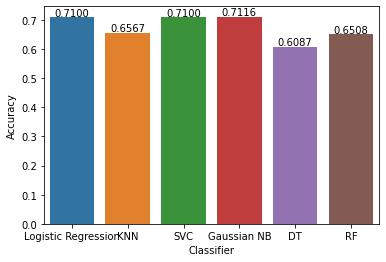

In [50]:
axis = sns.barplot(x = 'Name', y = 'Score', data = accuracy_df )
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Gaussian NB Classifier has the best accuracy amongst all the other classifiers.

## Prediction on new data

I will predict rating of the product using new values of customer review, sales price and discount percentage

In [51]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB()

In [52]:
print(classifier.predict(sc.transform([[1,400,40]])))

['2']


C:\Users\racha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
